Task 1: Improve the image quality by applying brightness and contrast enhancement techniques.
Task 2:Segment facial features to isolate eyes, mouth, and other key components.
Task 3: Detect edges to analyze facial structures and expressions.
Task 4: Use image blurring to soften non-essential features while keeping the focus on facial expressions.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Task 1: Enhanced Brightness and Contrast


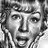

Task 2: Segmented Facial Features


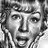

Task 3: Detected Edges


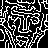

Task 4: Blurred Non-Essential Features


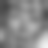

Task 1: Enhanced Brightness and Contrast


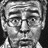

Task 2: Segmented Facial Features


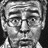

Task 3: Detected Edges


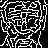

Task 4: Blurred Non-Essential Features


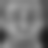

Task 1: Enhanced Brightness and Contrast


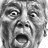

Task 2: Segmented Facial Features


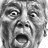

Task 3: Detected Edges


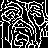

Task 4: Blurred Non-Essential Features


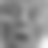

Task 1: Enhanced Brightness and Contrast


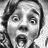

Task 2: Segmented Facial Features


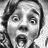

Task 3: Detected Edges


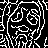

Task 4: Blurred Non-Essential Features


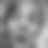

Task 1: Enhanced Brightness and Contrast


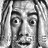

Task 2: Segmented Facial Features


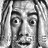

Task 3: Detected Edges


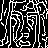

Task 4: Blurred Non-Essential Features


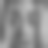

In [1]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive

# Mount Google Drive if necessary
drive.mount('/content/drive')

# Task 1: Enhance brightness and contrast using CLAHE
def enhance_brightness_contrast(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)  # Convert to LAB color space
    l_channel, a_channel, b_channel = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # CLAHE on L-channel
    enhanced_l = clahe.apply(l_channel)
    enhanced_image = cv2.merge((enhanced_l, a_channel, b_channel))
    enhanced_image = cv2.cvtColor(enhanced_image, cv2.COLOR_LAB2BGR)
    return enhanced_image

# Task 2: Segment facial features to highlight eyes and mouth
def segment_facial_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    mouth_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_mcs_mouth.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)  # Draw face rectangle
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = image[y:y+h, x:x+w]

        eyes = eye_cascade.detectMultiScale(roi_gray)  # Detect eyes
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

        mouth_region = roi_gray[int(h/2):, :]  # Detect mouth
        mouth = mouth_cascade.detectMultiScale(mouth_region, scaleFactor=1.7, minNeighbors=11)
        for (mx, my, mw, mh) in mouth:
            cv2.rectangle(roi_color, (mx, int(h/2) + my), (mx+mw, int(h/2) + my + mh), (0, 0, 255), 2)

    return image

# Task 3: Detect edges to analyze facial structure
def detect_edges(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # Reduce noise with Gaussian Blur
    edges = cv2.Canny(blurred, 50, 150)  # Canny Edge Detection
    return edges

# Task 4: Blur non-essential areas to emphasize facial expressions
def blur_non_essential_features(image):
    blurred = cv2.GaussianBlur(image, (21, 21), 0)  # Apply Gaussian blur
    return blurred

# Set path to dataset folder
dataset_path = '/content/drive/MyDrive/surprise'

# Process each image file
for image_file in os.listdir(dataset_path):
    image_path = os.path.join(dataset_path, image_file)

    if not (image_file.endswith('.png') or image_file.endswith('.jpg') or image_file.endswith('.jpeg')):
        continue  # Skip non-image files

    image = cv2.imread(image_path)  # Load the image

    # Task 1: Brightness and contrast enhancement
    enhanced_image = enhance_brightness_contrast(image)
    print("Task 1: Enhanced Brightness and Contrast")
    cv2_imshow(enhanced_image)

    # Task 2: Facial feature segmentation
    segmented_image = segment_facial_features(enhanced_image)
    print("Task 2: Segmented Facial Features")
    cv2_imshow(segmented_image)

    # Task 3: Edge detection
    edges_image = detect_edges(segmented_image)
    print("Task 3: Detected Edges")
    cv2_imshow(edges_image)

    # Task 4: Blur non-essential features
    blurred_image = blur_non_essential_features(segmented_image)
    print("Task 4: Blurred Non-Essential Features")
    cv2_imshow(blurred_image)

    cv2.waitKey(1000)  # Adjust timing as needed

# Clean up (optional)
cv2.destroyAllWindows()
